# Proyecto 1 - Torres de Hanoi

##### Ana María Garzón y Felipe Muñoz

Este proyecto tiene como objetivo encontrar la mejor secuencia para solucionar una versión del problema de las Torres de Hanoi. Este tiene como entorno tres postes y un conjunto de discos, cada uno con un hoyo en el centro y todos de distinto radio. El estado inicial del problema consiste en que todos los discos se encuentran ubicados en un único poste y cada disco descansa sobre otro de radio mayor. El problema a solucionar es mover todos los discos a otro poste, de modo que solo se puede mover un disco a la vez y todos los demás discos deben estar en un poste. Además, no se puede poner un disco sobre uno de menor radio.

### Ambiente y métodos

Para comenzar, importaremos el ambiente creado por Daniel Ramírez y Jenny Rivera

In [65]:
from AmbientesMP import *
from busqueda import *
from tiempos import *
prob = Hannoi()

A continuación, la visualización del estado inicial para un problema con tres discos.

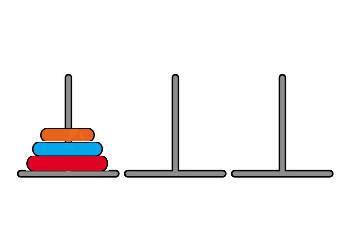

In [ ]:
s0 = prob.estado_inicial
prob.pintar_estado(s0)

Ahora, mostraremos como funcionan las transiciones del ambiente:

In [ ]:
# Método acciones aplicables
# Retorna un arreglo de listas con 3 componentes: 1 el radio de la ficha a mover,
# 2 la fila a la que se debe mover, 3 la columna
prob.acciones_aplicables(s0) 

[[1.0, 2.0, 1.0], [1.0, 2.0, 2.0]]

El costo de está acción es:  1


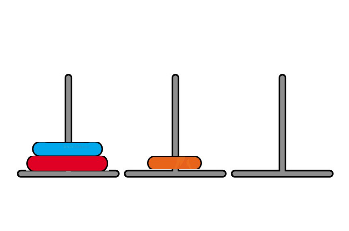

In [ ]:
# Ejecutar accion aplicable en la posición 0
# Mueve la ficha de radio 1, a la fila 2 y columna 1
a = prob.acciones_aplicables(s0)[0]
s1 = prob.transicion(s0,a) # método de transición de un estado a otro
prob.pintar_estado(s1)
print("El costo de está acción es: ", prob.costo(s0,a)) # El costo de mover una ficha es de 1

In [ ]:
# Método código
# Cada estado tiene un código único que lo diferencia de los demás, retornado con este método
print(prob.codigo(s1))

4.0-4.0-4.0-2.0-4.0-4.0-3.0-1.0-4.0


In [ ]:
# Método test objetivo
# Retorna verdadero o falso
# Evalúa si el estado (input) corresponde o no a la solución del problema.
prob.test_objetivo(s1)

False

Como se puede ver en la figura, el disco de radio de menor radio se ha movido, sin embargo, este movimiento no ha logrado un
estado considerado como válido para solucionar al problema, es por esto que falla el test objetivo.

Con el fin de illustrar mostraremos un escenario final donde el test objetivo debe retornar aprobado.

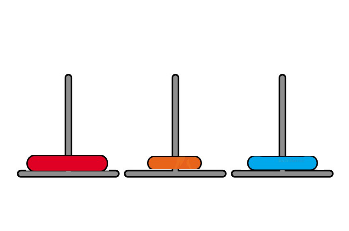

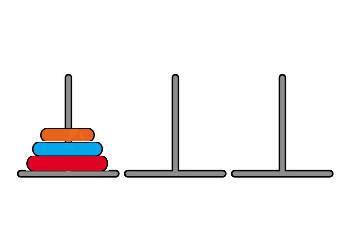

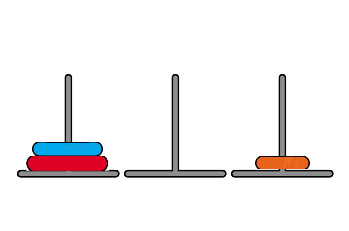

In [ ]:
prob.acciones_aplicables(s1)

for accion in prob.acciones_aplicables(s1):
  s = prob.transicion(s1,accion)
  prob.pintar_estado(s)

El estado supera el test objetivo:  True


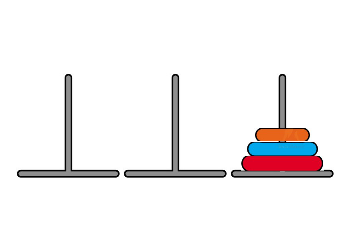

In [ ]:
a = prob.acciones_aplicables(s1)[2]
s2 = prob.transicion(s1,a) 



a = [2.0, 2.0, 1.0]
s3 = prob.transicion(s2,a) 

a = [1.0, 1.0, 0.0]
s4 = prob.transicion(s3,a) 

a = [2.0, 2.0, 2.0]
s5 = prob.transicion(s4,a)

a= [1.0, 1.0, 2.0]
s6 = prob.transicion(s5,a)

a = [3.0, 2.0, 1.0]
s7 = prob.transicion(s6,a)

a = [1.0, 1.0, 1.0]
s8 = prob.transicion(s7,a)

a = [2.0, 2.0, 0.0]
s9 = prob.transicion(s8,a)

a = [1.0, 1.0, 0.0]
s10 = prob.transicion(s9,a)

a = [3.0, 2.0, 2.0]
s11 = prob.transicion(s10,a)

a = [1.0, 2.0, 1.0]
s12 = prob.transicion(s11,a)

a = [2.0, 1.0, 2.0]
s13 = prob.transicion(s12,a)

a = [1.0, 0, 2.0]
s14 = prob.transicion(s13,a)
prob.pintar_estado(s14)

print("El estado supera el test objetivo: ", prob.test_objetivo(s14))

Si bien es posible encontrar una solución de manera manual, no existe manera de verificar si esta es la solución óptima; considerando óptimo como el uso del menor número de movimientos para resolver el problema. De igual manera, el aumento en el número de discos supone un incremento en la complejidad del problema, lo que lleva a buscar métodos de solución en los diferentes algoritmos de **búsqueda a ciegas.**

### Búsqueda a ciegas para solucionar el problema

Los diferentes algoritmos de búsqueda a ciegas apuntan a resolver diversos tipos de problemas mediante la caracterización de las acciones disponibles a partir de las decisiones tomadas. Estos algoritmos, como su nombre lo indica, no poseen información sobre la profundidad ni ubicación de la solución; por lo que su método de encontrarla varía ampliamente. De esta manera, se busca comprender y comparar la eficacia de los mismos en esta situación específica, ya que dependiendo de las reglas de cada problema su desempeño puede variar.

#### Búsqueda en anchura (Breadth first)
El algoritmo de búsqueda en anchura (breadth-first search) se basa en la verificación de todas las acciones aplicables sobre el estado actual del problema. En el caso específico de las torres de Hanoi, este algoritmo verificará **si mover cada uno de los discos posibles solucionará el problema**, antes de elegir una acción específica y continuar buscando la solución. 

La solución encontrada es correcta:  True


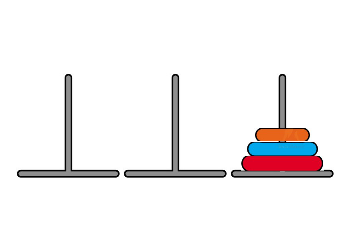

In [103]:
prob = Hannoi() 
s0 = prob.estado_inicial
sol_breadth_first = breadth_first_search(prob)

print("La solución encontrada es correcta: ", prob.test_objetivo(sol_breadth_first.estado))

prob.pintar_estado(sol_breadth_first.estado)


Como se puede evidenciar, tanto por la imagen como por el método de confirmación, la solución encontrada es correcta.

#### Busqueda a profundidad (Depth first)
Este algoritmo posee muchas similitudes en su funcionamiento con relación al anterior, sin embargo, se diferencia en su manera de explorar los diferentes estados del problema, profundizando en todas las posibles acciones a partir de cada estado hasta llegar a un estado final (**no necesariamente la solución**).

La solución encontrada es correcta:  True


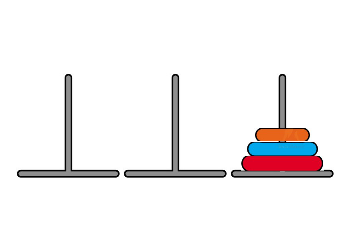

In [105]:
prob = Hannoi() 
sol_depth_first = depth_first_search(prob)

print("La solución encontrada es correcta: ", prob.test_objetivo(sol_depth_first.estado))

prob.pintar_estado(sol_depth_first.estado)

#### Busqueda a profundidad limitada (Depth limited)
A pesar de que la solución encontrada por el algoritmo de búsqueda en produndidad es correcta, este se puede llegar a estancar si se poseen las condiciones necesarias. Dadas las reglas del problema, mover un disco implica directamente que se puede regresar a la posición anterior, así el algoritmo puede entrar en un ciclo infinito y consumir recursos computacionales de manera indefinida. Debido a esto, se hace más pertinente la utilización de la búsqueda en profundidad limitada; evitando el gasto de recursos y permitiendo identificar la cantidad mínima de movimientos necesarios para solucionar el problema

In [106]:
prob = Hannoi() 

for i in range(10):
    sol_depth_lim = depth_limited_search(prob,i)
    if sol_depth_lim != 'cutoff':
        print('La solución encontrada para una profundidad de ', i ,' es correcta: ', prob.test_objetivo(sol_depth_lim.estado))
    else:
        print("No se encontró solucion para una profundidad de: ", i)

No se encontró solucion para una profundidad de:  0
No se encontró solucion para una profundidad de:  1
No se encontró solucion para una profundidad de:  2
No se encontró solucion para una profundidad de:  3
No se encontró solucion para una profundidad de:  4
No se encontró solucion para una profundidad de:  5
No se encontró solucion para una profundidad de:  6
La solución encontrada para una profundidad de  7  es correcta:  True
La solución encontrada para una profundidad de  8  es correcta:  True
La solución encontrada para una profundidad de  9  es correcta:  True


Esta comprobación repetida da lugar al **algoritmo de profundización iterativa**, el cual realiza la comprobación de las soluciones hasta un nivel específico (denominado como profundidad máxima).

### Algoritmo de Dijkstra (Best first)
Este algoritmo permite encontrar la solución de menor costo, comparando constantemente los caminos que llevan al objetivo, más epescificamente los costos de cada uno de estos. Si se encuentra un camino con menor costo al actual, se elegirá ese hasta que se encuentre uno menor; resultando así en una solución óptima sin asegurar un mejor desempeño temporal.

La solución encontrada es correcta:  True


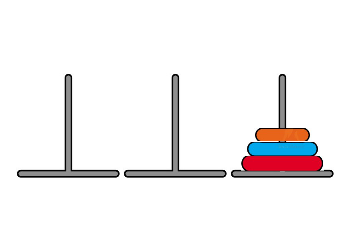

In [96]:
prob = Hannoi()

sol_best_first = best_first_search(prob)
print("La solución encontrada es correcta: ", prob.test_objetivo(sol_best_first.estado))
prob.pintar_estado(sol_best_first.estado)

### Búsqueda Avara (Greedy search)
Este algoritmo hace uso constante de una función heurística la cual acerca el estado actual hacía el objetivo, eligiendo los estados que mejor se adaptan a la función dada. Así, el algoritmo retorna valores cercanos al óptimo de una manera ágil.

In [98]:
# Función heurística
def piezas_mal_puestas(estado):
  prob = Hannoi(len(estado))
  objetivo = prob.estado_objetivo
  return len(np.argwhere(estado != objetivo))/2

La solución encontrada es correcta:  True


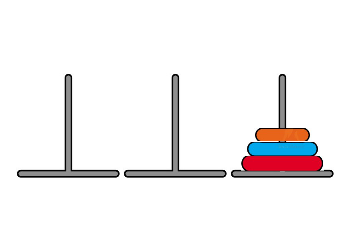

In [112]:
prob = Hannoi()

sol_greedy = greedy_search(prob, piezas_mal_puestas)

print("La solución encontrada es correcta: ", prob.test_objetivo(sol_greedy.estado))

prob.pintar_estado(sol_greedy.estado)

##Comparación de tiempo y costos

              sum_sq    df          F        PR(>F)
C(Función)  0.000107   5.0  19.503292  4.795206e-11
Residual    0.000059  54.0        NaN           NaN


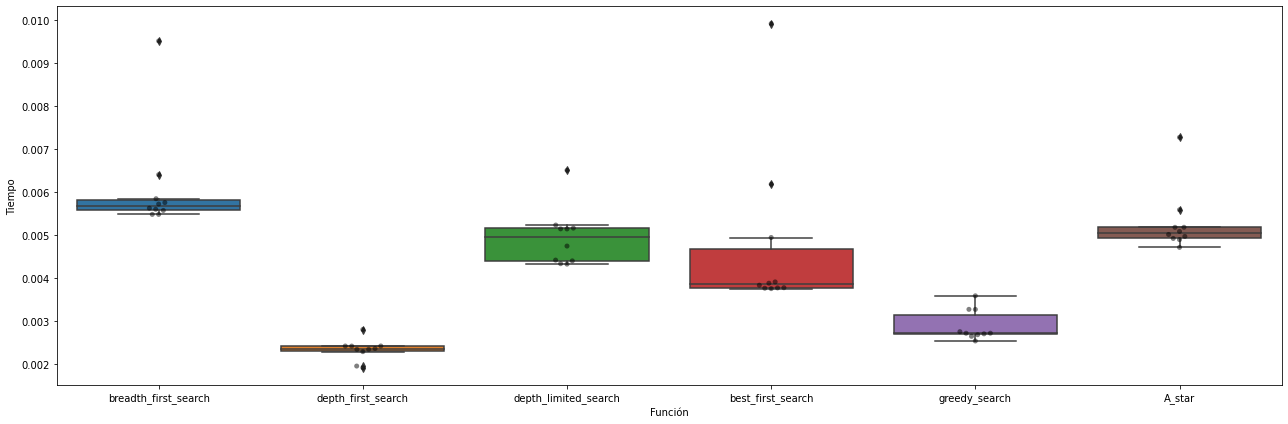

In [120]:
from random import sample
import warnings
warnings.filterwarnings('ignore')

funs = [lambda x: breadth_first_search(x),
        lambda x: depth_first_search(x),
        lambda x: depth_limited_search(x,7),
        lambda x: best_first_search(x,),
        lambda x: greedy_search(x,piezas_mal_puestas),
        lambda x: A_star(x, piezas_mal_puestas)
    ]

nombres = [
    'breadth_first_search', 
    'depth_first_search',
    'depth_limited_search',
    'best_first_search',
    'greedy_search',
    'A_star'
]

arg = Hannoi()
data = compara_funciones(funs=funs, arg=arg, nombres=nombres)
# Graficando
fig, ax = plt.subplots(1,1, figsize=(3*len(funs),6), tight_layout=True)
sns.boxplot(data=data, x='Función', y='Tiempo')
sns.swarmplot(data=data, x='Función', y='Tiempo', color='black', alpha = 0.5, ax=ax);
# Anova diferencia de medias
model = ols('Tiempo ~ C(Función)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

              sum_sq    df          F        PR(>F)
C(Función)  0.004896   5.0  66.862754  6.695061e-22
Residual    0.000791  54.0        NaN           NaN


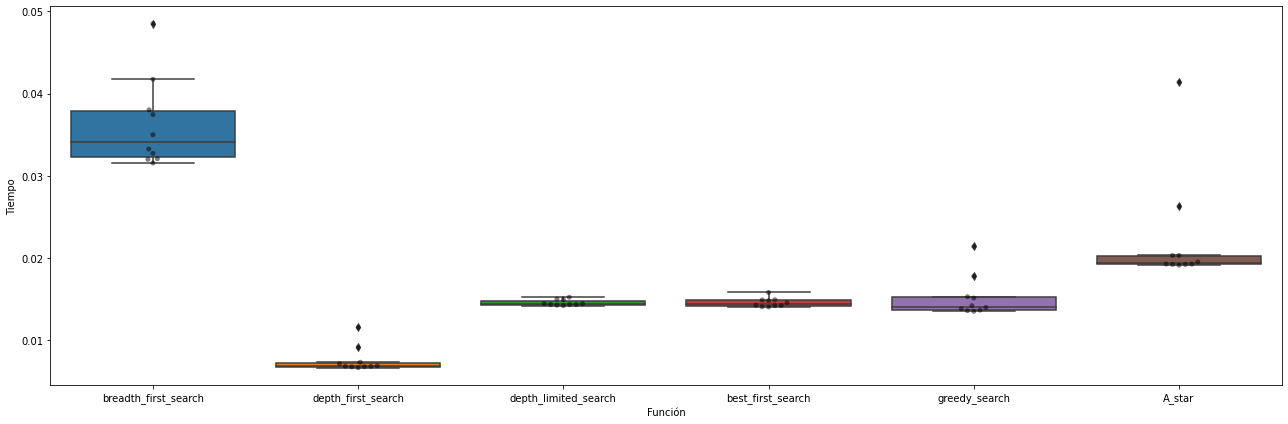

In [121]:
arg = Hannoi(4)
data = compara_funciones(funs=funs, arg=arg, nombres=nombres)
# Graficando
fig, ax = plt.subplots(1,1, figsize=(3*len(funs),6), tight_layout=True)
sns.boxplot(data=data, x='Función', y='Tiempo')
sns.swarmplot(data=data, x='Función', y='Tiempo', color='black', alpha = 0.5, ax=ax);
# Anova diferencia de medias
model = ols('Tiempo ~ C(Función)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

In [113]:
print('Costo breadth first: ', sol_breadth_first.costo_camino)
print('Costo depth first: ', sol_depth_first.costo_camino)
print('Costo depth limited: ', sol_depth_lim.costo_camino)
print('Costo best first: ', sol_best_first.costo_camino)
print('Costo greedy: ', sol_greedy.costo_camino)

Costo breadth first:  7
Costo depth first:  13
Costo depth limited:  8
Costo best first:  7
Costo greedy:  9


Una vez comparados los tiempos de ejecución para los diferentes algoritmos, procederemos a evaluar el desempeño de los mismos a nivel de optimización, es decir, el costo de las soluciones entregadas por estos. Con el fin de poseer una métrica relevante para medir la significancia de cada uno de los costos,estos se compararan con la medida exacta de la solución óptima, la cual se expresa en términos de la cantidad de discos en el entorno.

$mincosto(n) = 2^n + 1$

Para esta comparación se emplearán la búsqueda a profundidad, la búsqueda avara y el algoritmo $A^*$

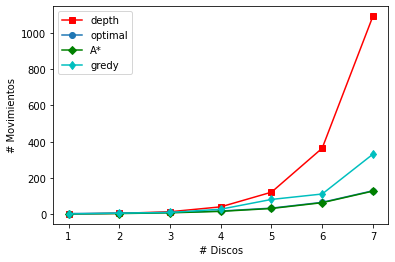

In [117]:
import warnings
warnings.filterwarnings('ignore')

costo_depth = []
costo_greedy = []
costo_astar = []
optimal = []

for n in range(1,8):
  optimal.append((2**n)+1)
  prob = Hannoi(n)
  sol_depth = depth_first_search(prob)
  sol_greedy = greedy_search(prob, piezas_mal_puestas)
  sol_a = A_star(prob, piezas_mal_puestas)

  costo_depth.append(sol_depth.costo_camino)
  costo_greedy.append(sol_greedy.costo_camino)
  costo_astar.append(sol_a.costo_camino)


t = np.arange(1,8,1)
plt.plot(t,costo_depth, 'rs', t,optimal, 'o', linestyle = '-')
plt.plot(t,costo_astar, 'gD', linestyle = '-')
plt.plot(t,costo_greedy, 'cd', linestyle = '-')
plt.legend(['depth','optimal', 'A*', 'gredy'])
plt.xlabel('# Discos')
plt.ylabel('# Movimientos')
plt.show()

